In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import plotly.express as px

%matplotlib inline

import os
print(os.listdir('C:\\Users\\Julia\\Desktop\\data'))


['top10s.csv']


In [13]:
data = pd.read_csv('C:\\Users\\Julia\\Desktop\\data\\top10s.csv',engine='python')
 
data.head(604)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


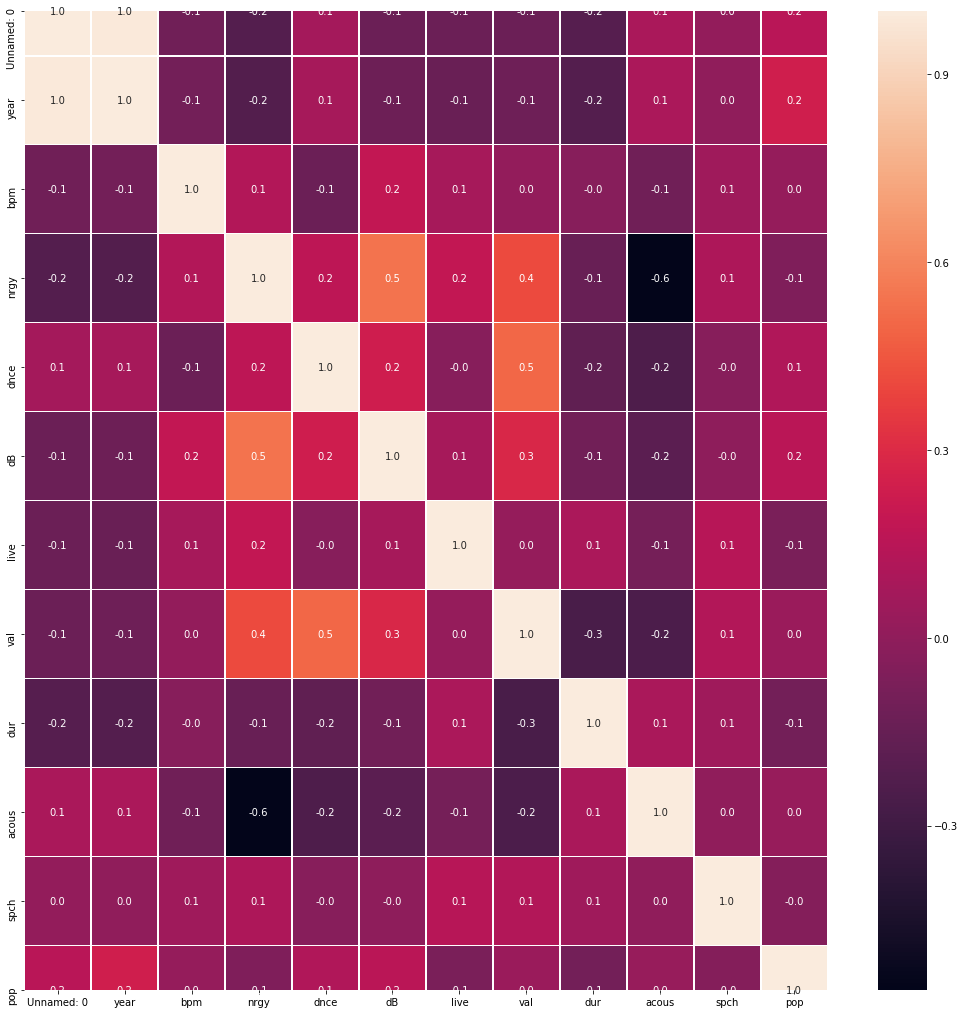

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [38]:
specific = ["nrgy", "live", "bpm", "val", "dB", "spch", "acous", "dnce", "dur", "year", "pop"]
text1 = data["artist"] + " - " + data["title"]
text2 = text1.values


X = data[specific].values
y = data["dnce"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=12,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="tg")

Mean value for dnce: 64.37976782752902


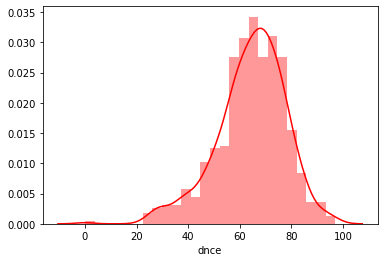

Mean value for nrgy: 70.50414593698176


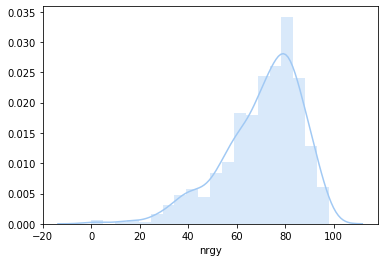

Mean value for dB: -5.5787728026534


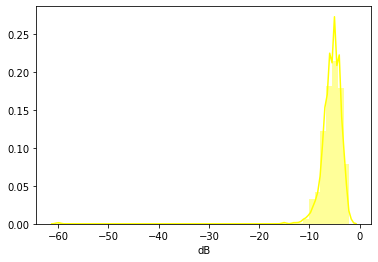

Mean value for spch: 8.35820895522388


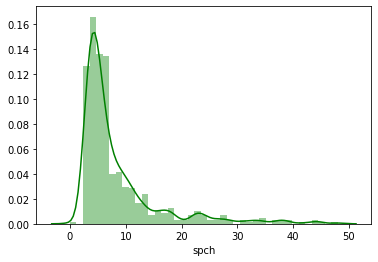

Mean value for acous: 14.32669983416252


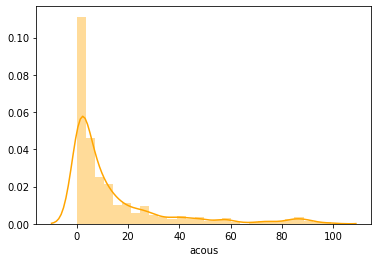

Mean value for dur: 224.67495854063017


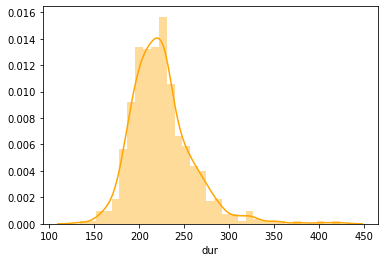

Mean value for live: 17.77446102819237


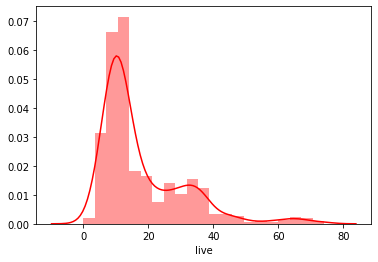

Mean value for val: 52.22553897180763


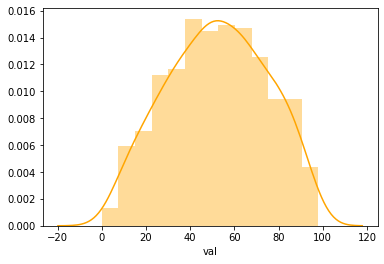

Mean value for bpm: 118.54560530679933


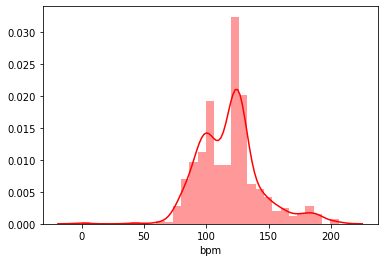

Mean value for year: 2014.592039800995


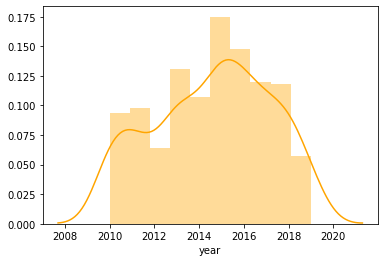

Mean value for pop: 66.52072968490879


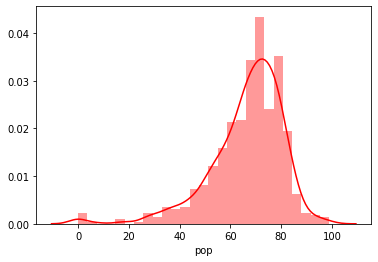

In [35]:
print("Mean value for dnce:", data['dnce'].mean())
sns.distplot(data['dnce'], color = 'red')
plt.show()
print("Mean value for nrgy:", data['nrgy'].mean())
sns.distplot(data['nrgy'])
plt.show()
print("Mean value for dB:", data['dB'].mean())
sns.distplot(data['dB'], color = 'yellow')
plt.show()
print("Mean value for spch:", data['spch'].mean())
sns.distplot(data['spch'], color = 'green')
plt.show()
print("Mean value for acous:", data['acous'].mean())
sns.distplot(data['acous'], color = 'orange')
plt.show()
print("Mean value for dur:", data['dur'].mean())
sns.distplot(data['dur'], color = 'orange')
plt.show()
print("Mean value for live:", data['live'].mean())
sns.distplot(data['live'], color = 'red')
plt.show()
print("Mean value for val:", data['val'].mean())
sns.distplot(data['val'], color = 'orange')
plt.show()
print("Mean value for bpm:", data['bpm'].mean())
sns.distplot(data['bpm'], color = 'red')
plt.show()
print("Mean value for year:", data['year'].mean())
sns.distplot(data['year'], color = 'orange')
plt.show()
print("Mean value for pop:", data['pop'].mean())
sns.distplot(data['pop'],color = 'red')
plt.show()

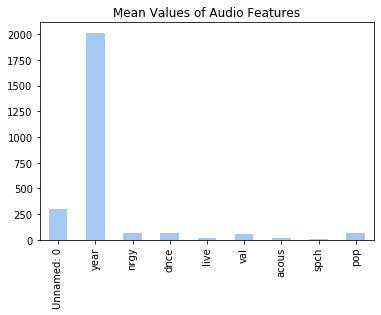

In [26]:
numeric = data.drop(['title','artist'], axis=1)
small = numeric.drop(['bpm','dur', 'dB','bpm'], axis=1)
sns.set_palette('pastel')
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()
#???

In [88]:
X = data["pop"].values.reshape(-1,1)
 

In [89]:
Y = data["year"].values.reshape(-1,1)
 

In [90]:
t  = TSNE(n_components=2,perplexity=len(Y)).fit_transform(list(X))

In [91]:
x, y = np.split(t, 2, axis=1)
x = x.reshape(603)
y = y.reshape(603)
np.shape(x), np.shape(y)

((603,), (603,))

In [92]:
px.scatter(x = x,
           y = y,
           color=data["pop"],
           hover_name=data["title"])